Vamos a realizar lo mismo que con el Barcelona pero con el Bayern

In [1]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt



import statsmodels.api as sm
import statsmodels.tsa.api as smt

from timeit import default_timer as timer

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


In [2]:


# Crear una lista para almacenar los datos de cada temporada
datos_temporadas = []

# Leer cada archivo CSV y agregar los datos en un DataFrame
carpeta = "CSVS"
archivos_csv = [archivo for archivo in os.listdir(carpeta) if archivo.endswith(".csv")]

for archivo in archivos_csv:
    # Extraer la fecha de la temporada del nombre del archivo
    fecha_temporada = archivo.split('.')[0]  # Suponiendo que la fecha está antes de la extensión .csv
    df_temporada = pd.read_csv(os.path.join(carpeta, archivo))
    # Agregar la columna de la temporada al DataFrame
    df_temporada['temporada'] = fecha_temporada
    datos_temporadas.append(df_temporada)

# Concatenar los DataFrames de todas las temporadas
datos_completos = pd.concat(datos_temporadas)

# Filtrar los partidos en los que el Barcelona es el equipo local o visitante
partidos_barcelona_local = datos_completos[datos_completos['equipo_local'] == 'Bayern']
partidos_barcelona_visitante = datos_completos[datos_completos['equipo_visitante'] == 'Bayern']

# Calcular la cantidad total de goles marcados por el Barcelona como local en cada temporada
goles_local_por_temporada = partidos_barcelona_local.groupby('temporada')['goles_equipo_local'].sum()

# Calcular la cantidad total de goles marcados por el Barcelona como visitante en cada temporada
goles_visitante_por_temporada = partidos_barcelona_visitante.groupby('temporada')['goles_equipo_visitante'].sum()

# Sumar los goles marcados por el Barcelona como local y visitante en cada temporada
goles_por_temporada = goles_local_por_temporada.add(goles_visitante_por_temporada, fill_value=0)

# Contar la cantidad de partidos jugados por el Barcelona en cada temporada
partidos_por_temporada = partidos_barcelona_local.groupby('temporada').size().add(partidos_barcelona_visitante.groupby('temporada').size(), fill_value=0)


# Crear un DataFrame con las estadísticas
estadisticas_barcelona = pd.DataFrame({
    'Temporada Bayern': goles_por_temporada.index,
    'Goles Marcados Bayern': goles_por_temporada.values,
    'Partidos Jugados Bayern': partidos_por_temporada.values
})

# Mostrar el DataFrame
print(estadisticas_barcelona)

#guardar en csv
estadisticas_barcelona.to_csv('estadisticas_bayern.csv', index=False)


  Temporada Bayern  Goles Marcados Bayern  Partidos Jugados Bayern
0      temp2017_18                   26.0                       12
1      temp2019_20                   43.0                       11
2      temp2020_21                   27.0                       10
3      temp2021_22                   31.0                       10
4      temp2022_23                   22.0                       10
5      temp2023_24                   20.0                       11


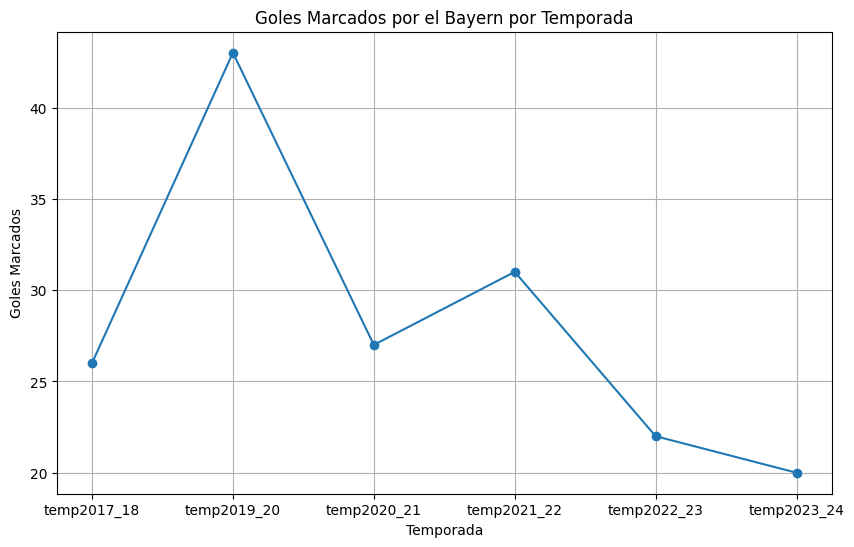

In [3]:
# Leer el DataFrame con las estadísticas del Barcelona
estadisticas_barcelona = pd.read_csv("estadisticas_bayern.csv")

# Establecer la "Temporada Barcelona" como índice
estadisticas_barcelona.set_index('Temporada Bayern', inplace=True)

# Visualizar los datos
plt.figure(figsize=(10, 6))
plt.plot(estadisticas_barcelona.index, estadisticas_barcelona['Goles Marcados Bayern'], marker='o')
plt.title('Goles Marcados por el Bayern por Temporada')
plt.xlabel('Temporada')
plt.ylabel('Goles Marcados')
plt.grid(True)
plt.show()

c:\Users\usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Error cuadrático medio: 70.4739799469204


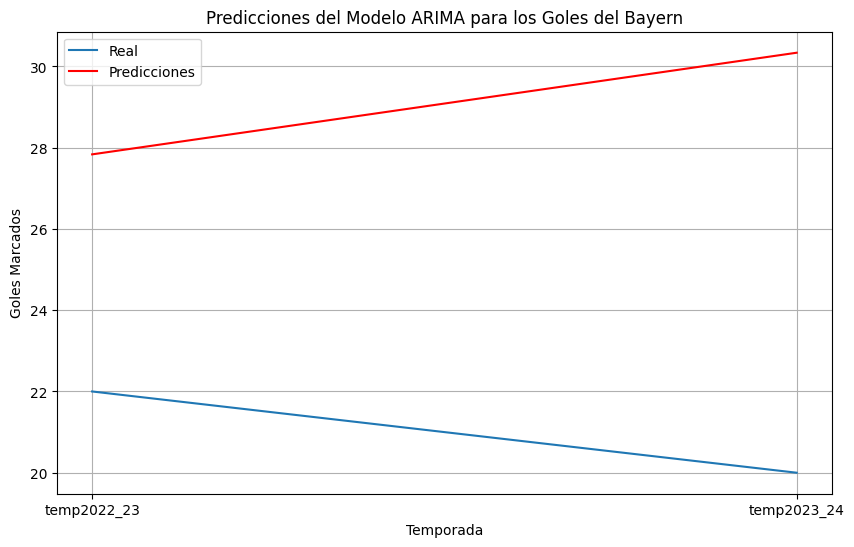

In [6]:

# Definir el tamaño del conjunto de entrenamiento
train_size = int(len(estadisticas_barcelona) * 0.8)

# Dividir los datos en entrenamiento y prueba
train = estadisticas_barcelona.iloc[:train_size]
test = estadisticas_barcelona.iloc[train_size:]

# Ajustar un modelo ARIMA
model = ARIMA(train['Goles Marcados Bayern'], order=(1,1,0)) # ARIMA(p,d,q)
model_fit = model.fit()



# Hacer predicciones en el conjunto de prueba
predictions = model_fit.forecast(steps=len(test))

# Calcular el error cuadrático medio
mse = mean_squared_error(test['Goles Marcados Bayern'], predictions)
print('Error cuadrático medio:', mse)

# Visualizar las predicciones
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['Goles Marcados Bayern'], label='Real')
plt.plot(test.index, predictions, color='red', label='Predicciones')
plt.title('Predicciones del Modelo ARIMA para los Goles del Bayern')
plt.xlabel('Temporada')
plt.ylabel('Goles Marcados')
plt.legend()
plt.grid(True)
plt.show()

c:\Users\usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observation

                                 SARIMAX Results                                 
Dep. Variable:     Goles Marcados Bayern   No. Observations:                    6
Model:                    ARIMA(5, 1, 1)   Log Likelihood                 -13.024
Date:                   Fri, 03 May 2024   AIC                             40.048
Time:                           20:04:34   BIC                             37.314
Sample:                                0   HQIC                            32.710
                                     - 6                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5817      0.485      1.200      0.230      -0.368       1.531
ar.L2          1.5725      0.041     38.449      0.000       1.492       1.653
ar.L3         -1.5694      0

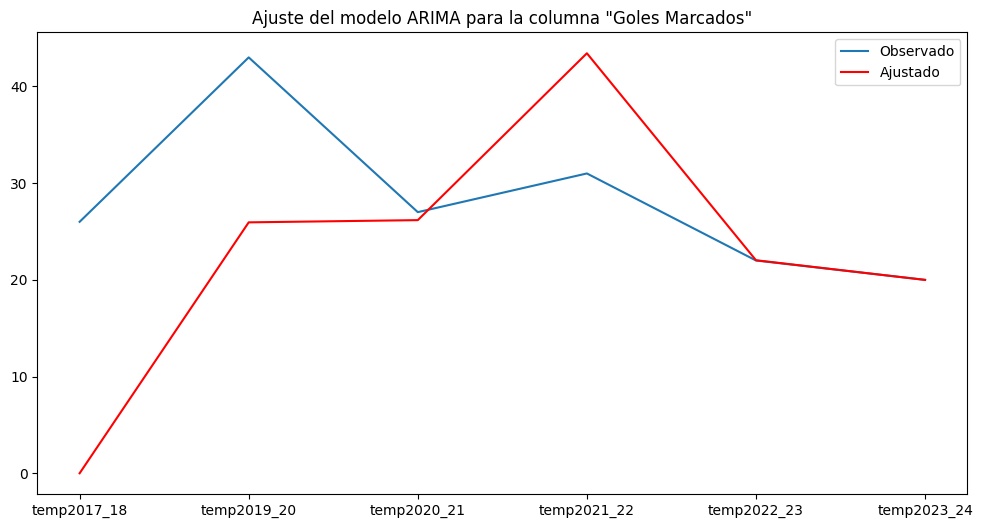

In [10]:
data = estadisticas_barcelona['Goles Marcados Bayern']

# Definir el modelo ARIMA
order = (5, 1, 1)
model = ARIMA(data, order=order)


# Ajustar el modelo
fitted_model = model.fit()

# Obtener resumen del modelo
print(fitted_model.summary())

# Visualizar los resultados
plt.figure(figsize=(12, 6))
plt.plot(data, label='Observado')
plt.plot(fitted_model.fittedvalues, color='red', label='Ajustado')
plt.title('Ajuste del modelo ARIMA para la columna "Goles Marcados"')
plt.legend()
plt.show()

Con este modelo Arima obtenemos un ajuste optimo

In [11]:
# Hacer predicciones para la próxima temporada
next_season_prediction = model_fit.forecast(steps=2)
print('Predicción de goles para las próximas temporadas:', next_season_prediction.round())

# Calcular la cantidad de partidos para la próxima temporada (asumiendo un promedio histórico)
average_matches_per_season = estadisticas_barcelona['Partidos Jugados Bayern'].mean()
next_season_matches = round(average_matches_per_season)
print('Número estimado de partidos para la próxima temporada:', next_season_matches)

Predicción de goles para las próximas temporadas: 4    28.0
5    30.0
Name: predicted_mean, dtype: float64
Número estimado de partidos para la próxima temporada: 11


c:\Users\usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Observamos que son bastante superiores a las del barcelona

Obtenemos mas datos:

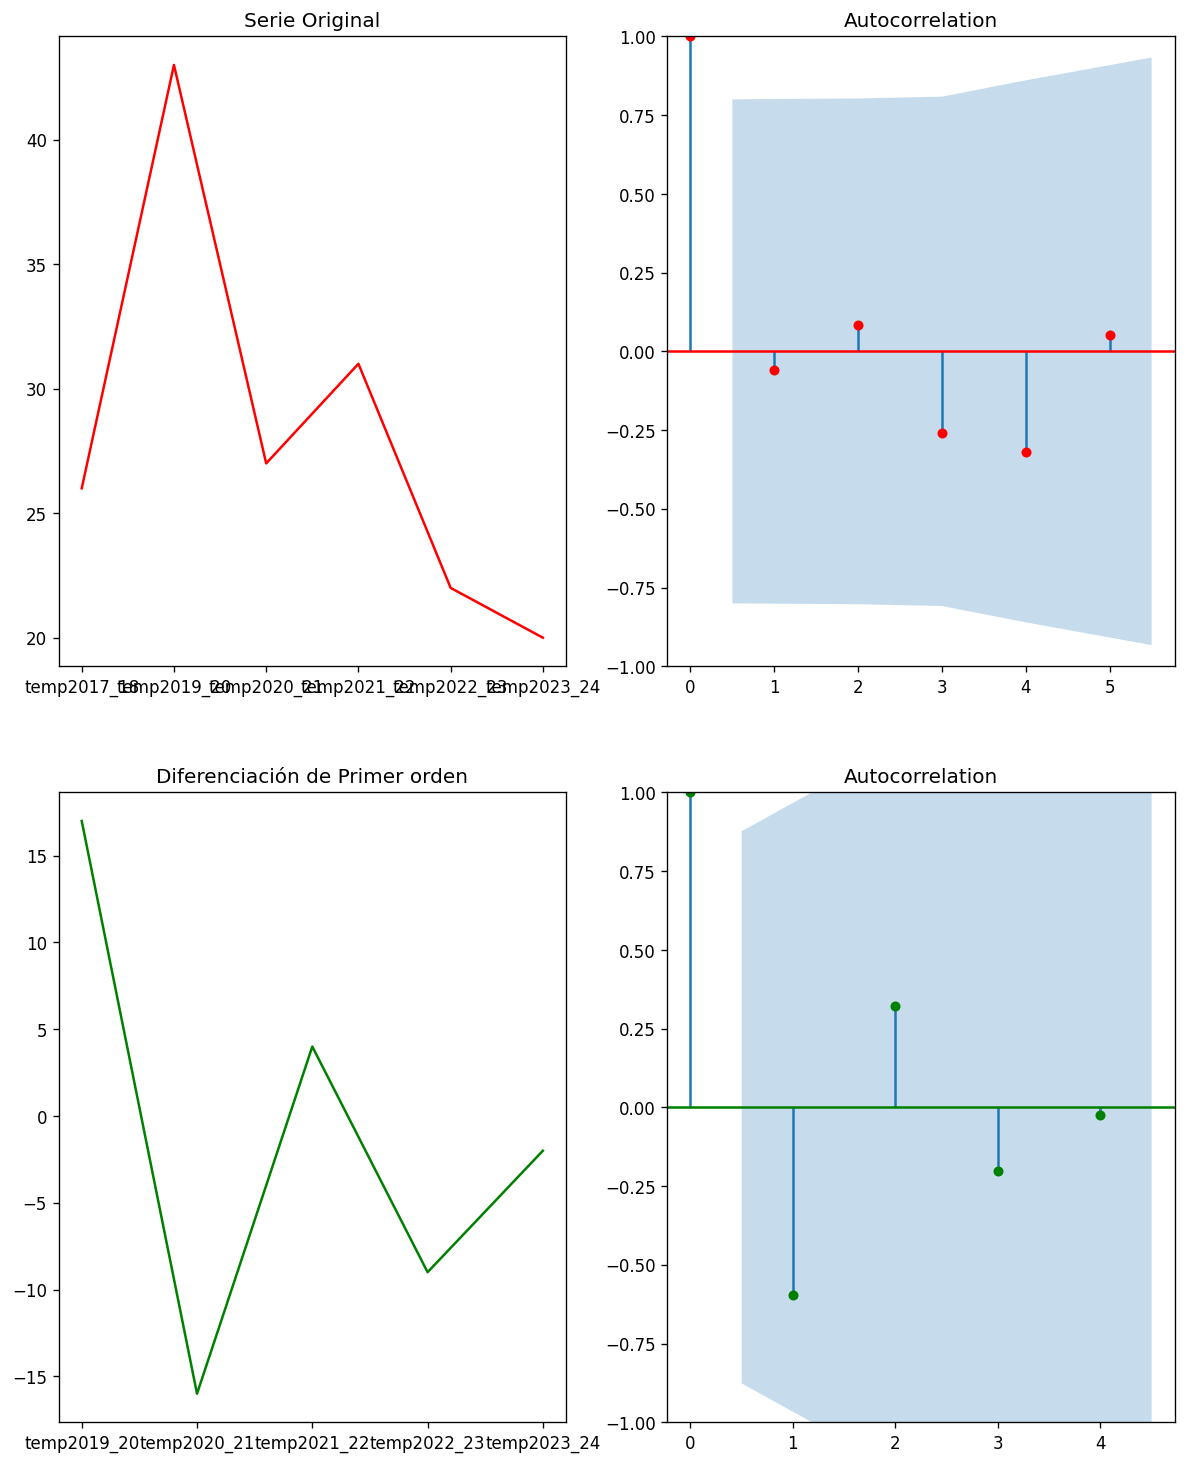

In [12]:
plt.rcParams.update({'figure.figsize':(12,15), 'figure.dpi':120})
# Serie Original
fig, axes = plt.subplots(2, 2, sharex=False)
axes[0, 0].plot(estadisticas_barcelona['Goles Marcados Bayern'],color="r"); axes[0, 0].set_title('Serie Original')
plot_acf(estadisticas_barcelona['Goles Marcados Bayern'], ax=axes[0, 1], color="r")

# Primera diferenciación 
axes[1, 0].plot(estadisticas_barcelona['Goles Marcados Bayern'].diff(), color="g"); axes[1, 0].set_title("Diferenciación de Primer orden")
plot_acf(estadisticas_barcelona['Goles Marcados Bayern'].diff().dropna(), ax=axes[1, 1],color="g")

plt.show();

No es estacionaria

C:\Users\usuario\AppData\Local\Temp\ipykernel_22572\74821127.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Goles Marcados Bayern Forecast'] = goals_forecast


Error cuadrático medio: 190.988011111111


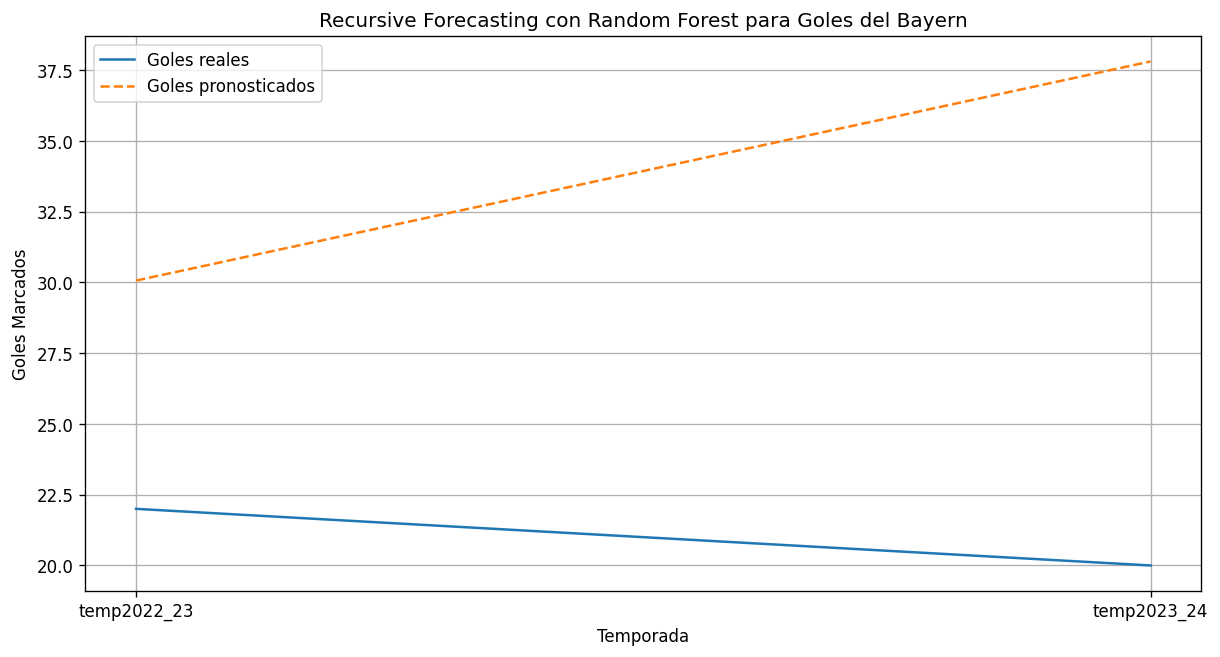

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Dividir el DataFrame en entrenamiento y prueba
train_size = int(len(estadisticas_barcelona) * 0.8)
train, test = estadisticas_barcelona.iloc[:train_size], estadisticas_barcelona.iloc[train_size:]

# Definir las características (X) y las etiquetas (y) para 'Goles Marcados Bayern'
X_train, y_train = train.drop('Goles Marcados Bayern', axis=1), train['Goles Marcados Bayern']
X_test, y_test = test.drop('Goles Marcados Bayern', axis=1), test['Goles Marcados Bayern']

# Inicializar el modelo Random Forest para 'Goles Marcados Bayern'
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Realizar Recursive Forecasting para 'Goles Marcados Bayern'
goals_forecast = model.predict(X_test)
test['Goles Marcados Bayern Forecast'] = goals_forecast

# Calcular el error cuadrático medio
mse = mean_squared_error(test['Goles Marcados Bayern'], test['Goles Marcados Bayern Forecast'])
print('Error cuadrático medio:', mse)

# Visualizar los resultados
plt.figure(figsize=(12, 6))
plt.plot(test.index, test['Goles Marcados Bayern'], label='Goles reales')
plt.plot(test.index, test['Goles Marcados Bayern Forecast'], label='Goles pronosticados', linestyle='dashed')
plt.legend()
plt.title('Recursive Forecasting con Random Forest para Goles del Bayern')
plt.xlabel('Temporada')
plt.ylabel('Goles Marcados')
plt.grid(True)
plt.show()


Error muy muy alto

C:\Users\usuario\AppData\Local\Temp\ipykernel_22572\2835020374.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Goles Marcados Bayern Forecast'] = goals_forecast


Error cuadrático medio: 288.99363859227947


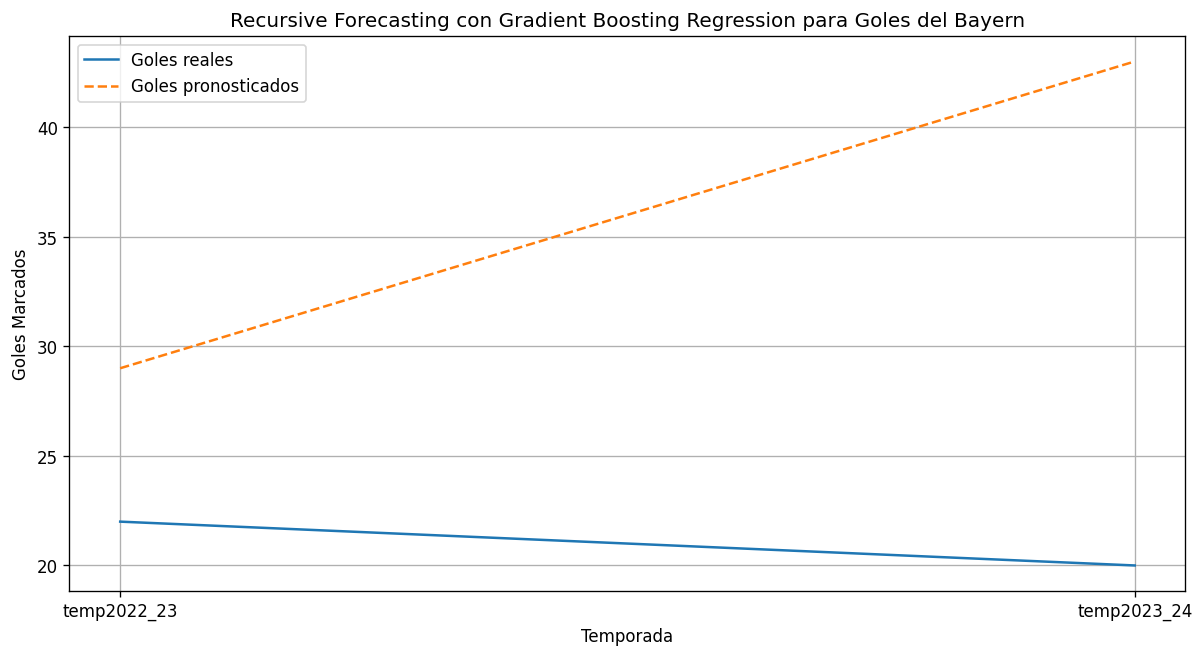

In [17]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Dividir el DataFrame en entrenamiento y prueba
train_size = int(len(estadisticas_barcelona) * 0.8)
train, test = estadisticas_barcelona.iloc[:train_size], estadisticas_barcelona.iloc[train_size:]

# Definir las características (X) y las etiquetas (y) para 'Goles Marcados Bayern'
X_train, y_train = train.drop('Goles Marcados Bayern', axis=1), train['Goles Marcados Bayern']
X_test, y_test = test.drop('Goles Marcados Bayern', axis=1), test['Goles Marcados Bayern']

# Inicializar el modelo Gradient Boosting Regression para 'Goles Marcados Bayern'
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Realizar Recursive Forecasting para 'Goles Marcados Bayern'
goals_forecast = model.predict(X_test)
test['Goles Marcados Bayern Forecast'] = goals_forecast

# Calcular el error cuadrático medio
mse = mean_squared_error(test['Goles Marcados Bayern'], test['Goles Marcados Bayern Forecast'])
print('Error cuadrático medio:', mse)

# Visualizar los resultados
plt.figure(figsize=(12, 6))
plt.plot(test.index, test['Goles Marcados Bayern'], label='Goles reales')
plt.plot(test.index, test['Goles Marcados Bayern Forecast'], label='Goles pronosticados', linestyle='dashed')
plt.legend()
plt.title('Recursive Forecasting con Gradient Boosting Regression para Goles del Bayern')
plt.xlabel('Temporada')
plt.ylabel('Goles Marcados')
plt.grid(True)
plt.show()


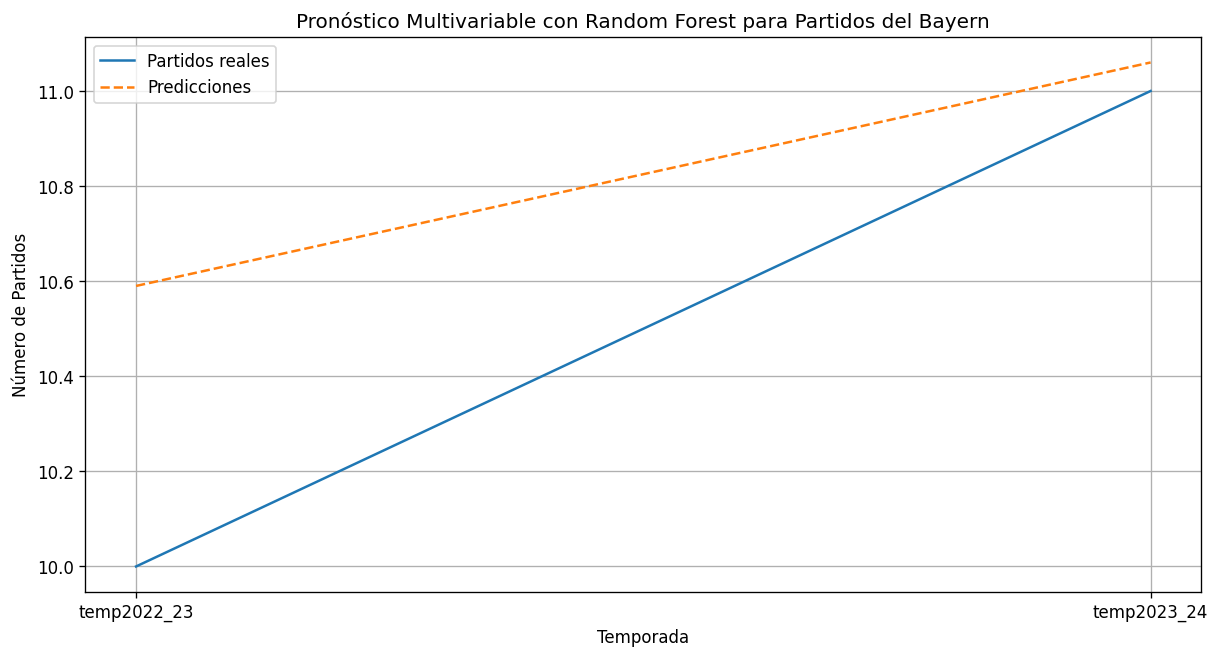

Error cuadrático medio: 0.17584999999999995


In [18]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Definir las características (X) y las etiquetas (y) para el modelo
features = ['Goles Marcados Bayern', 'Partidos Jugados Bayern']
X_train, y_train = train[features], train['Partidos Jugados Bayern']
X_test, y_test = test[features], test['Partidos Jugados Bayern']

# Inicializar el modelo Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones para el conjunto de prueba
predictions = model.predict(X_test)

# Crear una copia de la sección de prueba antes de asignar las predicciones
test_copy = test.copy()

# Agregar las predicciones al DataFrame de prueba
test_copy['Predicciones'] = predictions

# Visualizar los resultados
plt.figure(figsize=(12, 6))
plt.plot(test_copy.index, test_copy['Partidos Jugados Bayern'], label='Partidos reales')
plt.plot(test_copy.index, test_copy['Predicciones'], label='Predicciones', linestyle='dashed')
plt.legend()
plt.xlabel('Temporada')
plt.ylabel('Número de Partidos')
plt.title('Pronóstico Multivariable con Random Forest para Partidos del Bayern')
plt.grid(True)
plt.show()

from sklearn.metrics import mean_squared_error

# Calcular el error cuadrático medio
mse = mean_squared_error(test_copy['Partidos Jugados Bayern'], predictions)
print('Error cuadrático medio:', mse)


utilizando un pronostico multivariable es lo más óptimo para reducir el error en los goles del Bayern, y parece que lo unico porque los demas modelos utilizados tienes un eror excesivamente alto, puede deberse a la alta diferencia de goles del bayern en las ultimas temporadas de la champions